## Grouping

The pandas `groupby` function allows us to group our data on the values in a column or column to look at summary measures for records sharing the same values.

For example, let's load the speed camera dataset again and ask which camera locations or days of the week have produced the most violations.

In [1]:
import pandas as pd
df = pd.read_csv("data/Speed_Camera_Violations.csv")
df.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,7738 S WESTERN,CHI065,07/08/2014,65,NaN,NaN,NaN,NaN,NaN
1,1111 N HUMBOLDT,CHI010,07/16/2014,56,NaN,NaN,NaN,NaN,NaN
2,5520 S WESTERN,CHI069,07/08/2014,10,NaN,NaN,NaN,NaN,NaN
3,1111 N HUMBOLDT,CHI010,07/26/2014,101,NaN,NaN,NaN,NaN,NaN
4,1111 N HUMBOLDT,CHI010,07/27/2014,92,NaN,NaN,NaN,NaN,NaN


Now that the data is loaded, let's find the 10 locations with the most total violations recorded.

To do this, we need to group by the ADDRESS column, then examine the VIOLATIONS column of the resulting grouped dataframe.

In [2]:
# first let's group by address and look at descriptive statistics for the first 10 records
df.groupby(["ADDRESS"])["VIOLATIONS"].describe().head(10)

,count,mean,std,min,25%,50%,75%,max
ADDRESS,,,,,,,,
10318 S INDIANAPOLIS,1084.0,99.974170,39.412342,4.0,72.00,96.0,120.25,259.0
1110 S PULASKI RD,499.0,22.412826,15.078174,1.0,11.00,18.0,31.00,83.0
1111 N HUMBOLDT,1096.0,58.250000,18.067744,6.0,46.00,57.0,70.00,117.0
11144 S VINCENNES,526.0,19.612167,10.058579,1.0,12.25,18.0,25.00,75.0
11153 S VINCENNES,517.0,9.698259,5.182134,1.0,6.00,9.0,13.00,31.0
1117 S PULASKI RD,492.0,19.483740,12.954320,1.0,10.00,17.0,27.00,61.0
1142 W IRVING PARK,1091.0,84.210816,29.672455,1.0,64.00,81.0,101.00,248.0
115 N OGDEN,1094.0,41.311700,35.887579,1.0,13.00,28.0,61.00,197.0
1226 N WESTERN AVE,531.0,18.617702,15.435526,1.0,6.00,14.0,28.00,88.0


The above records aren't sorted in any meaningful way, but the first thing to note is that the Index is no longer just an integer, it is now the Address. This is because the `groupby` method returns a special object with a new index made up of the 
values of the column being grouped on.

We can still use the `loc` indexer with this new grouped object to, for example, find the count for a given address:

In [3]:
# `count` returns the number of rows for this address, not the total violation count.
# IE this tells us the number of observations.
df.groupby(["ADDRESS"])["VIOLATIONS"].count().loc["19 W CHICAGO AVE"]

432

In [4]:
# to get the total violation count, we want the `sum` method:
df.groupby(["ADDRESS"])["VIOLATIONS"].sum().loc["19 W CHICAGO AVE"]

1618

In [5]:
# Now let's get the top 10 camera locations by total violation count:
df.groupby(["ADDRESS"])["VIOLATIONS"].sum().sort_values(ascending=False).head(10)

ADDRESS
4909 N CICERO AVE       220704
445 W 127TH             169337
2900 W OGDEN            139183
4124 W FOSTER AVE       127071
10318 S INDIANAPOLIS    108372
2705 W IRVING PARK      107599
1142 W IRVING PARK       91874
536 E MORGAN DR          82331
5816 W JACKSON           80174
4831 W LAWRENCE AVE      69538
Name: VIOLATIONS, dtype: int64

It's possible that some locations just have more observations than others, so a more meaningful measure is probably the mean violation count per observation. To get this we just need to use the `mean` function rather than `sum`.

In [6]:
df.groupby(["ADDRESS"])["VIOLATIONS"].mean().sort_values(ascending=False).head(10)

ADDRESS
4909 N CICERO AVE       226.595483
445 W 127TH             154.645662
2900 W OGDEN            126.876026
4124 W FOSTER AVE       120.332386
10318 S INDIANAPOLIS     99.974170
2705 W IRVING PARK       99.078269
215 E 63RD ST            84.689008
1142 W IRVING PARK       84.210816
536 E MORGAN DR          75.188128
2549 W ADDISON           73.668488
Name: VIOLATIONS, dtype: float64

How about days of the week? *When* are people most likely to be caught speeding?

The simplest way to do this is to create a new weekday column and group on that.

In [7]:
# datetime series have a special `dt` property that exposes the date/time-specific functionality.
# In this case, dayofweek is a 0-based index where 0 = Monday, 6 = Sunday.
df["VIOLATION DATE"] = pd.to_datetime(df["VIOLATION DATE"], format="%m/%d/%Y")
df["VIOLATION DATE"].dt.dayofweek.head()

0    1
1    2
2    1
3    5
4    6
Name: VIOLATION DATE, dtype: int64

In [8]:
df["DAY OF WEEK"] = df["VIOLATION DATE"].dt.dayofweek
df.groupby(["DAY OF WEEK"])["VIOLATIONS"].mean()

DAY OF WEEK
0    27.446626
1    26.745172
2    27.110899
3    28.371709
4    30.219523
5    42.380211
6    41.233922
Name: VIOLATIONS, dtype: float64

## Plotting

It's not easy to understand at a glance the distribution of speeding violations by day of the week above, so let's produce a simple plot to visualize and help understand it.

Pandas has a number of convenience functions to let us output plots directly without having to interact with matplotlib.

In [9]:
# a bit of jupyter-specific magic
%matplotlib inline

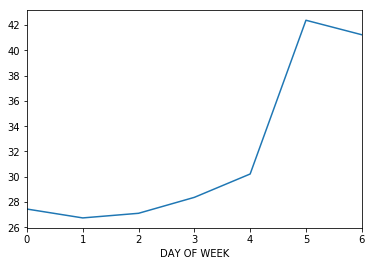

In [10]:
# We can call `plot` on just about anything to get a minimally-formatted plot
df.groupby(["DAY OF WEEK"])["VIOLATIONS"].mean().plot()

We can do much better. Let's do a horizontal bar plot, renaming the labels to the actual days of the week, and starting the X-axis at 0 to give a better sense of how much this data actually varies.

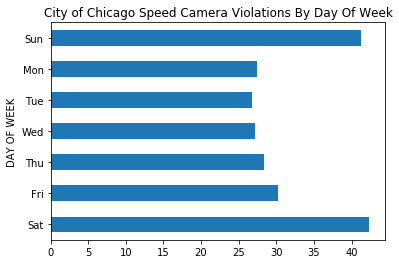

In [11]:
# Create a mapping of day number to day name
daynames = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}

# save the "sum of violations grouped-by day of week" series in a variable
violations_by_day_of_week = df.groupby(["DAY OF WEEK"])["VIOLATIONS"].mean()

# use the mapping created above to give the series index labels sensible values
violations_by_day_of_week.rename(index=daynames, inplace=True)

# use the reindex method to order them the way we want in the plot (starting with Sunday at the top of the y axis)
violations_by_day_of_week = violations_by_day_of_week.reindex(["Sat", "Fri", "Thu", "Wed", "Tue", "Mon", "Sun"])

# and finally, create the bar plot
violations_by_day_of_week.plot(kind='barh', title="City of Chicago Speed Camera Violations By Day Of Week") 

## Combining DataFrames

Often you will need to combine data from multiple data sets together. There are two types of combinations: concatenations and merges (aka joins).

**Concatenating** means taking multiple DataFrame objects and appending their rows together to make a new DataFrame. In general you will do this when your datasets contain the same columns and you are combining observations of the same type together into one dataset that contains all the rows from all the datasets.

**Merging** is joining DataFrames together SQL-style by using common values. This is useful when you have multiple datasets with common keys and you want to combine them into one dataset that contains columns from all the datasets being merged.

In [12]:
# Concatenation example
df1 = pd.DataFrame({'A': [1, 2, 3],
                    'B': [4, 5, 6]})

df2 = pd.DataFrame({'A': [7, 8, 9],
                    'B': [10, 11, 12]})

print("df1: ")
print(df1)
print()
print("df2: ")
print(df2)
print()
print("concatenated: ")
print(pd.concat([df1, df2]))


df1: 
   A  B
0  1  4
1  2  5
2  3  6

df2: 
   A   B
0  7  10
1  8  11
2  9  12

concatenated: 
   A   B
0  1   4
1  2   5
2  3   6
0  7  10
1  8  11
2  9  12


In [13]:
# Merge example
df1 = pd.DataFrame({'A': [1, 2, 3],
                    'B': [4, 5, 6]})

df2 = pd.DataFrame({'A': [1, 2, 3],
                    'C': ["foo", "bar", "baz"]})

print("df1: ")
print(df1)
print()
print("df2: ")
print(df2)
print()
print("merged: ")
print(pd.merge(df1, df2))

df1: 
   A  B
0  1  4
1  2  5
2  3  6

df2: 
   A    C
0  1  foo
1  2  bar
2  3  baz

merged: 
   A  B    C
0  1  4  foo
1  2  5  bar
2  3  6  baz


## Hierarchical Indexing

Up to now we have looked only at 1- and 2-dimensional data. While Pandas does offer objects for handling 3- and 4-dimesional data (the `Panel` and `Panel4D`), it's often more convenient to keep higher dimensional data in a `DataFrame` but use an index with multiple *levels*. This kind of index is called a `MultiIndex` in pandas.

Let us use for example mean annual water level data for the great lakes for 2015 and 2016. We'd like to be able to look up, by year and lake, the mean water level, in a single series. To do this, we can just create the series as before, but pass in a list of lists for the index.

In [14]:
data = [183.57, 183.58, 176.59, 176.70, 175.20, 175.35, 174.32, 174.41, 74.74, 74.80]


labels = [
    ['Superior', 'Superior',
     'Michigan-Huron', 'Michigan-Huron',
     'St. Clair', 'St. Clair',
     'Erie', 'Erie',
     'Ontario', 'Ontario'],
    [2015, 2016,
     2015, 2016,
     2015, 2016,
     2015, 2016,
     2015, 2016,]
]

mean_levels = pd.Series(data, index=labels)
mean_levels.index.rename(['Lake', 'Year'])
mean_levels

Superior        2015    183.57
                2016    183.58
Michigan-Huron  2015    176.59
                2016    176.70
St. Clair       2015    175.20
                2016    175.35
Erie            2015    174.32
                2016    174.41
Ontario         2015     74.74
                2016     74.80
dtype: float64

In [15]:
# We can now get data by Lake and Year:
mean_levels['Superior', 2015]

183.56999999999999

In [16]:
# Or do "partial indexing": select a label from one level of the index, getting back a series with all remaining levels:
mean_levels['Superior']

2015    183.57
2016    183.58
dtype: float64

In [17]:
# to do partial indexing on the "inner" level, we need to pass in an empty slice for the outer level:
mean_levels[:, 2015]

Superior          183.57
Michigan-Huron    176.59
St. Clair         175.20
Erie              174.32
Ontario            74.74
dtype: float64

But why torture a series like this when this data could easily be represented in a DataFrame, with the lakes as columns?

Because we can do this same thing with more series and combine them into a dataframe that shares this two-dimensional index! If you squint, it's higher-dimensional data!!

We have a CSV containing monthly water level readings for the great lakes going back to 1918. We'll use it to calculate annual min and max readings, and then combine those calculated series with this series that contains annual means to create a new dataframe with year and lake as the index, and min, max, and mean as the columns.

In [18]:
# the `index_col` parameter allows us to specify which columns to use as an index when creating
# the dataframe and in which order. Very handy!
df = pd.read_csv('data/GLHYD_data_metric.csv', header=12, index_col=[1, 0])
df.head()

Superior  Michigan-Huron  St. Clair    Erie  Ontario
year month                                                      
1918 jan      183.25          176.71     174.59  173.90    74.74
     feb      183.20          176.73     174.74  173.82    74.72
     mar      183.17          176.80     174.74  174.01    74.92
     apr      183.14          176.89     174.84  174.02    75.10
     may      183.22          176.99     175.00  173.98    75.09

At this point we have the lakes as *columns*, when what we really want is to take all of those column names and add them to our index as another level. This is exactly what the very useful [`stack`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method does. It "pivots" a level of column labels as a new innermost index level.

In this case, because our dataframe has only one level of column labels, `stack` turns that level into a new index level leaving us with only a series. We have "moved a dimension" and transformed a dataframe with a 2-d index to a series with a 3-d index.

In [19]:
lake_monthly_levels = df.stack()
lake_monthly_levels.head()

year  month                
1918  jan    Superior          183.25
             Michigan-Huron    176.71
             St. Clair         174.59
             Erie              173.90
             Ontario            74.74
dtype: float64

Now in order to make it easy for Pandas to combine series we want to give our index levels nice, consistent names.

In [20]:
lake_monthly_levels.index.set_names(['Year', 'Month', 'Lake'], inplace=True)
lake_monthly_levels.head()

Year  Month  Lake          
1918  jan    Superior          183.25
             Michigan-Huron    176.71
             St. Clair         174.59
             Erie              173.90
             Ontario            74.74
dtype: float64

In [21]:
# Calculate the max water level for each year for each lake
max_levels = lake_monthly_levels.groupby(['Year', 'Lake']).agg('max')
max_levels.head()

Year  Lake          
1918  Superior          183.46
      Michigan-Huron    177.07
      St. Clair         175.17
      Erie              174.12
      Ontario            75.10
dtype: float64

In [22]:
min_levels = lake_monthly_levels.groupby(['Year', 'Lake']).agg('min')
min_levels.head()

Year  Lake          
1918  Superior          183.14
      Michigan-Huron    176.71
      St. Clair         174.59
      Erie              173.82
      Ontario            74.72
dtype: float64

If we were to try to merge these three series together now, Pandas would fail because the index levels aren't in the same order. So the `mean_levels` series needs to have the order of its index levels swapped so that "Year" is the outer level. This is easily done with the `reorder_levels` method.

In [23]:
mean_levels = mean_levels.reorder_levels([1, 0])
mean_levels.index.set_names(['Year', 'Lake'], inplace=True)
mean_levels

Year  Lake          
2015  Superior          183.57
2016  Superior          183.58
2015  Michigan-Huron    176.59
2016  Michigan-Huron    176.70
2015  St. Clair         175.20
2016  St. Clair         175.35
2015  Erie              174.32
2016  Erie              174.41
2015  Ontario            74.74
2016  Ontario            74.80
dtype: float64

And now, finally, we can merge these three series together into a new dataframe (and drop all observations before 2015 that don't have). Note this is a very contrived example as it would have been trivially easy to calculate the mean water levels from the CSV we loaded :)

In [24]:
df = pd.DataFrame({'Mean': mean_levels, 'Max': max_levels, 'Min': min_levels}).dropna()
df

Max    Mean     Min
Year Lake                                  
2015 Erie            174.74  174.32  173.99
     Michigan-Huron  176.73  176.59  176.48
     Ontario          75.21   74.74   74.41
     St. Clair       175.56  175.20  174.74
     Superior        183.69  183.57  183.42
2016 Erie            174.65  174.41  174.17
     Michigan-Huron  176.84  176.70  176.51
     Ontario          75.11   74.80   74.46
     St. Clair       175.51  175.35  175.12
     Superior        183.70  183.58  183.46

In [25]:
# to select values based on just the inner index level, use the `xs` ("cross section") method:
df.xs('Erie', level=1)

,Max,Mean,Min
Year,,,
2015,174.74,174.32,173.99
2016,174.65,174.41,174.17


In [26]:
# Alternatively, you can still use `loc` and pass in an empty slice for the outer level:
df.loc[(slice(None), 'Erie'), :]

,,Max,Mean,Min
Year,Lake,,,
2015,Erie,174.74,174.32,173.99
2016,Erie,174.65,174.41,174.17
